In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from random import choices
import scipy.stats as stats
from scipy.stats import shapiro, normaltest
from matplotlib.pyplot import figure

In [2]:
df = pd.read_excel('the data for your group project_MA541.xlsx')
df.head()

Close_ETF       oil      gold       JPM
0  97.349998  0.039242  0.004668  0.032258
1  97.750000  0.001953 -0.001366 -0.002948
2  99.160004 -0.031514 -0.007937  0.025724
3  99.650002  0.034552  0.014621  0.011819
4  99.260002  0.013619 -0.011419  0.000855

##### Part 1: Meet the data
##### Data description ‚Äì This data includes four columns/random variables: the daily ETF return; the daily relative change in the price of the crude oil; the daily relative change in the gold price; and the daily return of the JPMorgan Chase & Co stock. The sample size is 1000.

##### Requirements ‚Äì Use any software to obtain the sample mean and sample standard deviation for each random variable (column) of the data; the sample correlations among each pair of the four random variables (columns) of the data.

In [3]:
print("Close_ETF Mean : " + str(np.mean(df['Close_ETF'])))
print("Oil Mean : " + str(np.mean(df['oil'])))
print("Gold Mean : " + str(np.mean(df['gold'])))
print("JPM Mean : " + str(np.mean(df['JPM'])))

Close_ETF Mean : 121.1529600120001
Oil Mean : 0.0010300354937470015
Gold Mean : 0.0006628360819999998
JPM Mean : 0.0005304110210000002


In [4]:
print("Close_ETF standard deviation : " + str(np.std(df['Close_ETF'])))
print("Oil standard deviation : " + str(np.std(df['oil'])))
print("Gold standard deviation : " + str(np.std(df['gold'])))
print("JPM standard deviation : " + str(np.std(df['JPM'])))

Close_ETF standard deviation : 12.563503845944297
Oil standard deviation : 0.021082349463798354
Gold standard deviation : 0.011283414317347945
JPM standard deviation : 0.011011052723643009


In [5]:
#Output co-relation between columns
df.corr()

Close_ETF       oil      gold       JPM
Close_ETF   1.000000 -0.009045  0.022996  0.036807
oil        -0.009045  1.000000  0.235650 -0.120849
gold        0.022996  0.235650  1.000000  0.100170
JPM         0.036807 -0.120849  0.100170  1.000000

In [6]:
#Describe detail about colums 
df.describe()

Close_ETF          oil         gold          JPM
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    121.152960     0.001030     0.000663     0.000530
std      12.569790     0.021093     0.011289     0.011017
min      96.419998    -0.116533    -0.065805    -0.048217
25%     112.580002    -0.012461    -0.004816    -0.005538
50%     120.150002     0.001243     0.001030     0.000386
75%     128.687497     0.014278     0.007482     0.006966
max     152.619995     0.087726     0.042199     0.057480

##### Part 2: Describe your data
#####  Requirements ‚Äì Use any software to draw the following plots:

1) A histogram for each column (hint: four histograms total)

(array([  4.,   9.,  36., 190., 440., 243.,  61.,  14.,   2.,   1.]),
 array([-0.04821678, -0.03764713, -0.02707747, -0.01650782, -0.00593817,
         0.00463148,  0.01520113,  0.02577078,  0.03634043,  0.04691008,
         0.05747974]),
 <BarContainer object of 10 artists>)

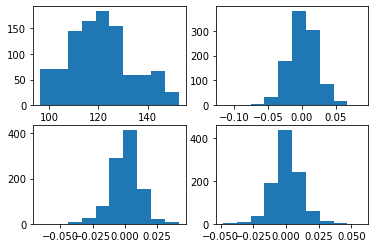

In [7]:
plt.subplot(2,2,1)
#plt.title('A Histogram of Close_ETF Data Set')
plt.hist(df['Close_ETF'])
plt.subplot(2,2,2)
#plt.title('A Histogram of Oil Data Set')
plt.hist(df['oil'])
plt.subplot(2,2,3)
#plt.title('A Histogram of Gold Data Set')
plt.hist(df['gold'])
plt.subplot(2,2,4)
#plt.title('A Histogram of JPM Data Set')
plt.hist(df['JPM'])

array([[<AxesSubplot:title={'center':'Close_ETF'}>,
        <AxesSubplot:title={'center':'oil'}>],
       [<AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'JPM'}>]], dtype=object)

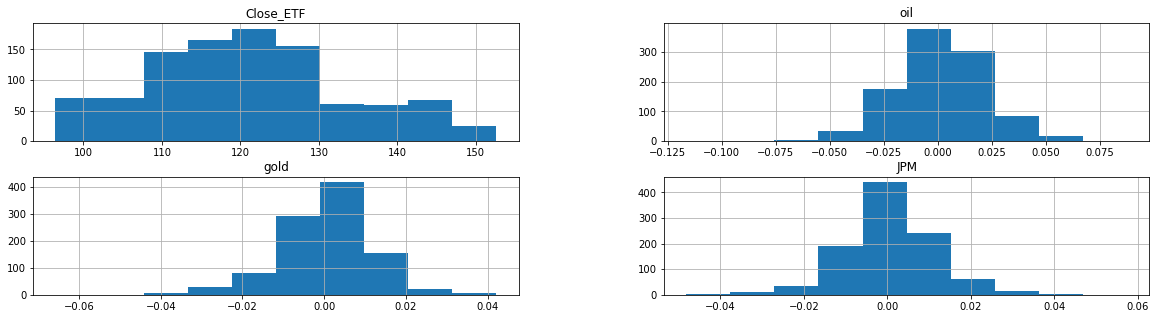

In [8]:
df.hist(figsize= (20, 5))

C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='JPM', ylabel='Density'>

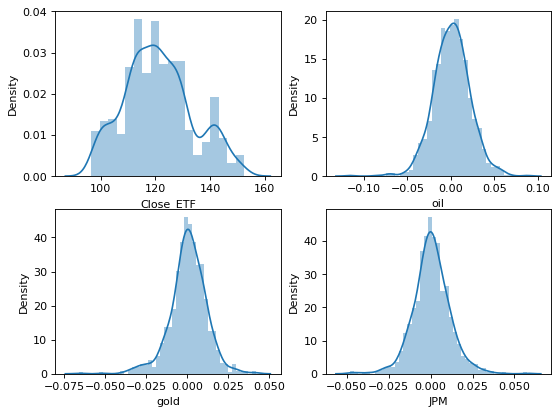

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.subplot(2,2,1)
sns.distplot(df['Close_ETF'], hist=True, kde=True)
plt.subplot(2,2,2)
sns.distplot(df['oil'], hist=True, kde=True)
plt.subplot(2,2,3)
sns.distplot(df['gold'], hist=True, kde=True)
plt.subplot(2,2,4)
sns.distplot(df['JPM'], hist=True, kde=True)



2) A time series plot for each column (hint: use the series ‚Äú1, 2, 3, ‚Ä¶, 1000‚Äù as the horizontal axis; four plots total)

<AxesSubplot:ylabel='Close_ETF'>

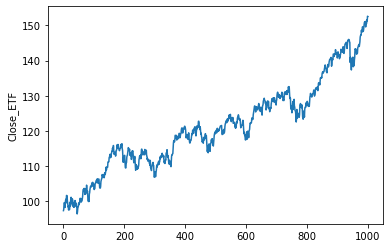

In [10]:
#Time series plot for ETF
sns.lineplot(data=df['Close_ETF'])

<AxesSubplot:ylabel='oil'>

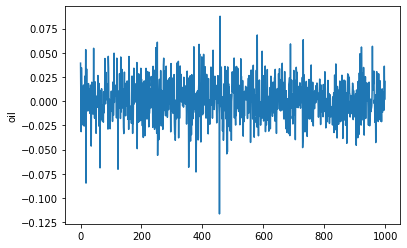

In [11]:
#Time series plot for oil
sns.lineplot(data=df['oil'])

<AxesSubplot:ylabel='gold'>

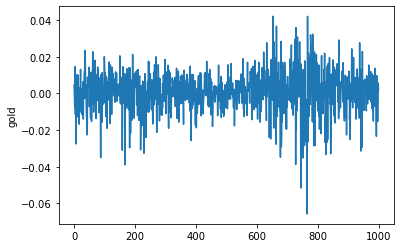

In [12]:
#Time series plot for gold
sns.lineplot(data=df['gold'])

<AxesSubplot:ylabel='JPM'>

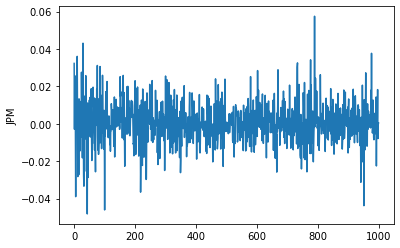

In [13]:
#Time series plot for JPM
sns.lineplot(data=df['JPM'])

3) A time series plot for all four columns (hint: one plot including four ‚Äúcurves‚Äù and each ‚Äúcurve‚Äù describes one column)

<AxesSubplot:>

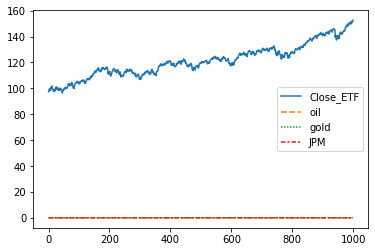

In [14]:
#Time series plot for All columns
sns.lineplot(data=df)

4) Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively

<AxesSubplot:xlabel='Close_ETF', ylabel='oil'>

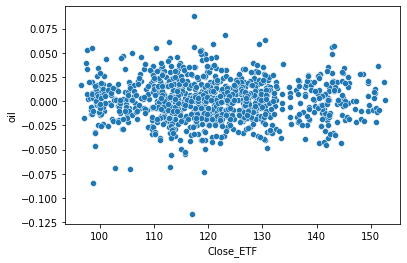

In [15]:
#Scatter plots plot between the ETF column and the OIL column
sns.scatterplot(data=df, x="Close_ETF", y="oil")

Text(0.5, 0, 'Close_ETF')

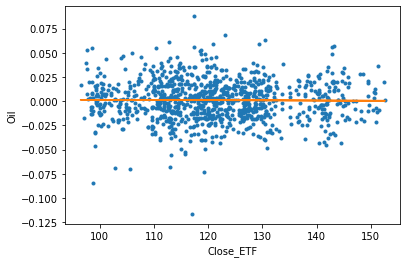

In [16]:
plt.plot(df["Close_ETF"], df["oil"], '.')
m, b = np.polyfit(df["Close_ETF"], df["oil"], 1)
plt.plot(df["Close_ETF"], m*df["Close_ETF"] + b)
plt.ylabel('Oil')
plt.xlabel('Close_ETF')

<AxesSubplot:xlabel='Close_ETF', ylabel='gold'>

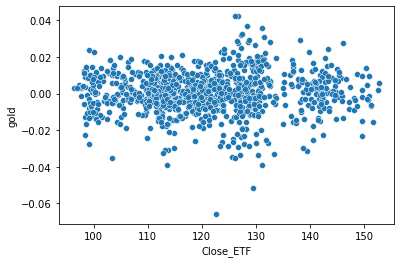

In [17]:
#Scatter plots plot between the ETF column and the GOLD column
sns.scatterplot(data=df, x="Close_ETF", y="gold")

Text(0.5, 0, 'Close_ETF')

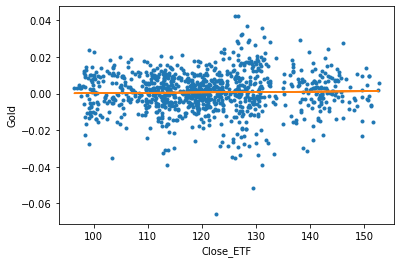

In [18]:
plt.plot(df["Close_ETF"], df["gold"], '.')
m, b = np.polyfit(df["Close_ETF"], df["gold"], 1)
plt.plot(df["Close_ETF"], m*df["Close_ETF"] + b)
plt.ylabel('Gold')
plt.xlabel('Close_ETF')

<AxesSubplot:xlabel='Close_ETF', ylabel='JPM'>

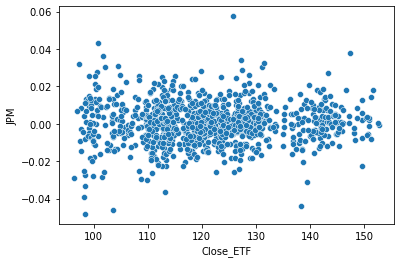

In [19]:
#Scatter plots plot between the ETF column and the JPM column
sns.scatterplot(data=df, x="Close_ETF", y="JPM")

Text(0.5, 0, 'Close_ETF')

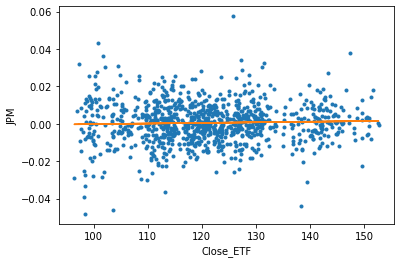

In [20]:
plt.plot(df["Close_ETF"], df["JPM"], '.')
m, b = np.polyfit(df["Close_ETF"], df["JPM"], 1)
plt.plot(df["Close_ETF"], m*df["Close_ETF"] + b)
plt.ylabel('JPM')
plt.xlabel('Close_ETF')

#### Part 3: What distribution does your data follow
#### Requirements ‚Äì Propose an assumption/a hypothesis regarding the type of distribution each column of the data set may follow (i.e., the ETF, OIL, GOLD, and JPM column), based on the plots from Part 2. Then verify or object that assumption/hypothesis with appropriate tests (for example, normality test). You may use any software to perform those tests.

------------- ETF Histogram -------------


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close_ETF', ylabel='Density'>

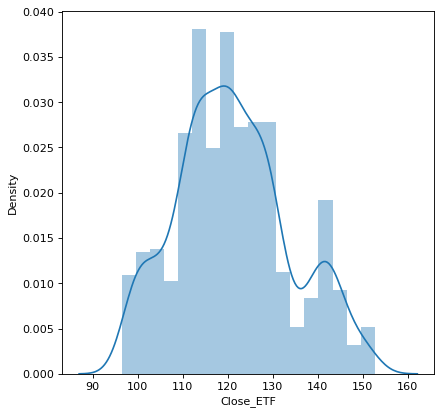

In [21]:
print("------------- ETF Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['Close_ETF'], hist=True, kde=True)

-------------------- Normality test for ETF ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=1302.829, p=0.000
Sample does not look Gaussian (reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)


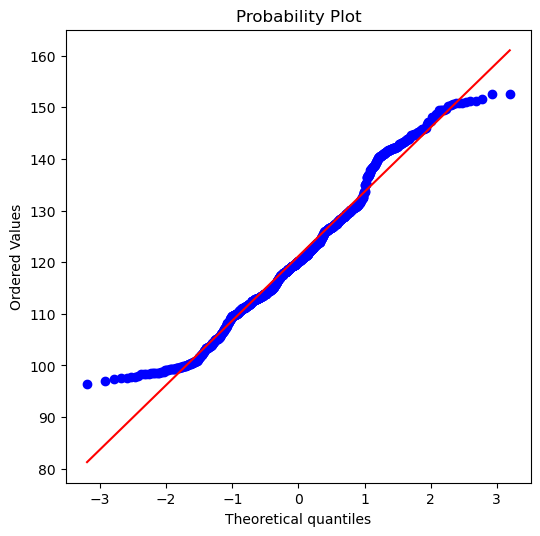

In [22]:
import numpy as np
import pylab
import scipy.stats as stats
from scipy.stats import chisquare

print('-------------------- Normality test for ETF ------------------------')
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["Close_ETF"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------') 
stat, p1 = chisquare(df["Close_ETF"])
print('Statistics=%.3f, p=%.3f' % (stat, p1))

alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------')    

stat, p2 = shapiro(df["Close_ETF"])
print('Statistics=%.3f, p=%.3f' % (stat, p2))

alpha = 0.05
if p2 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

------------- Oil Histogram -------------


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oil', ylabel='Density'>

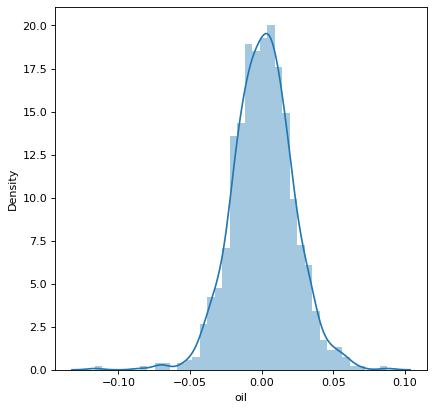

In [23]:
print("------------- Oil Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['oil'], hist=True, kde=True)

-------------------- Normality test for Oil ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=431.505, p=1.000
Sample looks Gaussian (fail to reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.989, p=0.000
Sample does not look Gaussian (reject H0)


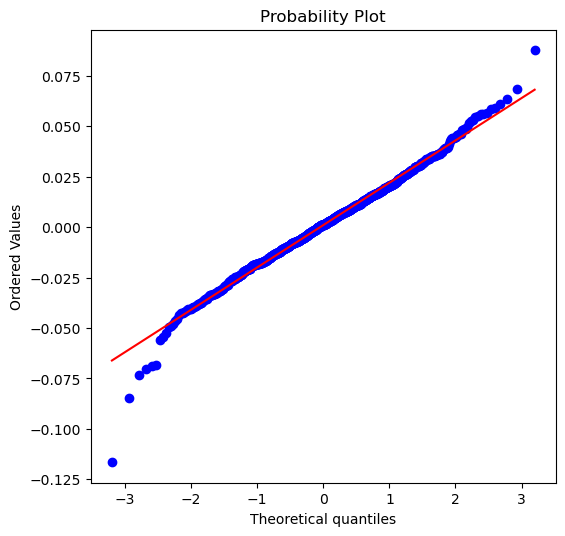

In [24]:
print('-------------------- Normality test for Oil ------------------------') 
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["oil"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------') 
stat, p1 = chisquare(df["oil"])
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------')

stat, p2 = shapiro(df["oil"])
print('Statistics=%.3f, p=%.3f' % (stat, p2))

alpha = 0.05
if p2 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

------------- Gold Histogram -------------


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gold', ylabel='Density'>

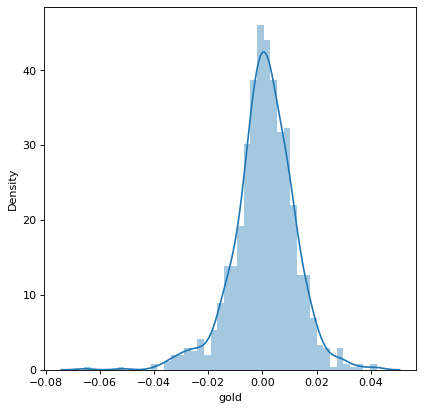

In [25]:
print("------------- Gold Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['gold'], hist=True, kde=True)

-------------------- Normality test for Gold ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=192.077, p=1.000
Sample looks Gaussian (fail to reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)


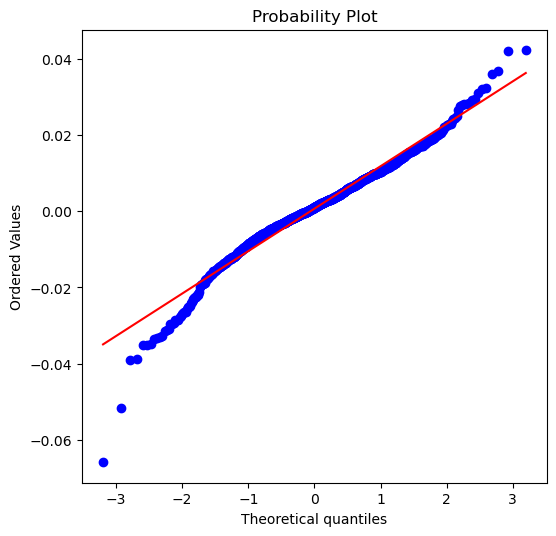

In [26]:
print('-------------------- Normality test for Gold ------------------------') 
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["gold"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------')
stat, p = chisquare(df["gold"])
print('Statistics=%.3f, p=%.3f' % (stat, p1))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------') 
stat, p = shapiro(df["gold"])
print('Statistics=%.3f, p=%.3f' % (stat, p2))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

------------- JPM Histogram -------------


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JPM', ylabel='Density'>

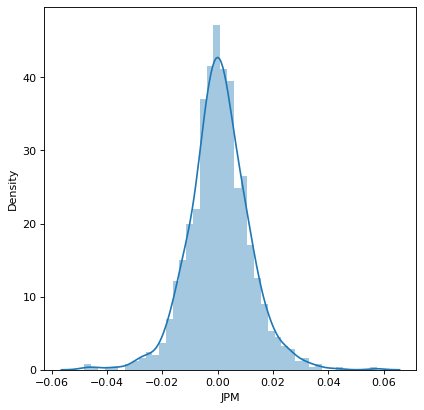

In [27]:
print("------------- JPM Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['JPM'], hist=True, kde=True)

-------------------- Normality test for JPM ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=228.584, p=1.000
Sample looks Gaussian (fail to reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)


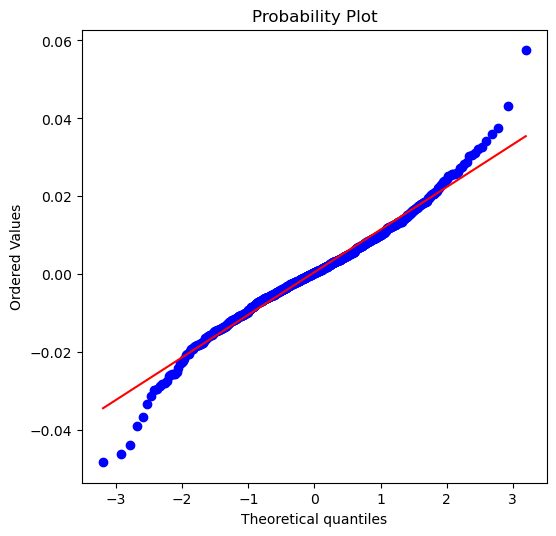

In [28]:
print('-------------------- Normality test for JPM ------------------------') 
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["JPM"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------')
stat, p = chisquare(df["JPM"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------')    
stat, p = shapiro(df["JPM"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

#### 4. Break your data into small groups and let them discuss the importance of the Central Limit Theorem
#### Requirements ‚Äì Consider the ETF column (1000 values) as the population (x), and do the follows. Any software may be used.

In [29]:

#Sequential split of data
def split_data_seq(data, size):
    return np.array_split(data, size)

#To print sample mean
def print_mean(data):
    for index, value in enumerate(data):
        print("group" + str(index+1) + "---> " + str(np.mean(value)))

# Return array of sample mean        
def mean_array(data):
    mean_value = []
    for value in data:
        mean_value.append(np.mean(value))
    return mean_value

# mean of sample means  
def mean_mean(data):
    return np.mean(mean_array(data))

# standard deviation of mean
def std_of_samples(data):
    return np.std(mean_array(data))

# For spliting data randomly 
def split_data_random(data, size, groups):
    random_array = []
    for i in range(groups):
        random_array.append(choices(data, k=size))
    return random_array

1) Calculate the mean ùúáùë• and the standard deviation ùúéùë• of the population.

In [30]:
print('Mean of ETF column', np.mean(df['Close_ETF']))
print('Standard Deviation ETF column', np.std(df['Close_ETF']))

Mean of ETF column 121.1529600120001
Standard Deviation ETF column 12.563503845944297


2) Break the population into 50 groups sequentially and each group includes 20 values.

In [31]:
#Spliting 50 groups sequentially
seq_data_50 = split_data_seq(df['Close_ETF'], 50)

3) Calculate the sample mean (ùë•) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., use the histogram to assess the normality of the data consisting of these sample means.

In [32]:
#sample mean
print("Sample mean (ùë•) of each group")
print_mean(seq_data_50)

Sample mean (ùë•) of each group
group1---> 99.32100080000002
group2---> 99.55399975000002
group3---> 99.15400055
group4---> 102.55050039999999
group5---> 103.29199995000002
group6---> 105.09350015
group7---> 106.75099974999998
group8---> 111.6580009
group9---> 114.49950014999997
group10---> 114.40050045000001
group11---> 112.77649960000001
group12---> 112.28599980000001
group13---> 111.80899929999998
group14---> 113.27149915
group15---> 109.9474991
group16---> 110.14300039999998
group17---> 112.53550034999998
group18---> 112.0754997
group19---> 117.78150055
group20---> 120.0504997
group21---> 118.20800089999997
group22---> 119.98099934999998
group23---> 119.76750025000001
group24---> 116.80299985000003
group25---> 117.24199984999998
group26---> 120.55450105
group27---> 121.09150044999998
group28---> 123.40999985
group29---> 122.7170002
group30---> 120.61099994999998
group31---> 120.50799975000002
group32---> 125.79700005
group33---> 126.88300015
group34---> 127.30250020000003
group35-

C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

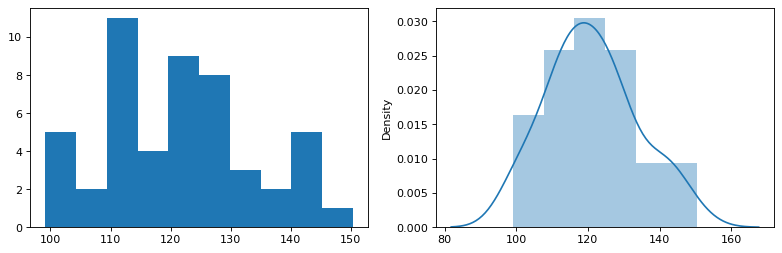

In [33]:
#Histogram of mean of samples
mean_seq_data_50 = mean_array(seq_data_50)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_seq_data_50)
plt.subplot(2,2,2)
sns.distplot(mean_seq_data_50, hist=True, kde=True)

Total Sample :  1000


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

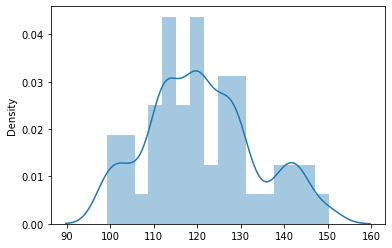

In [34]:
#Histogram of mean of samples for 1000 sample
array_of_mean = []
for i in range(20):
    seq_data = split_data_seq(df['Close_ETF'], 50)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

Statistics=1287.459, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


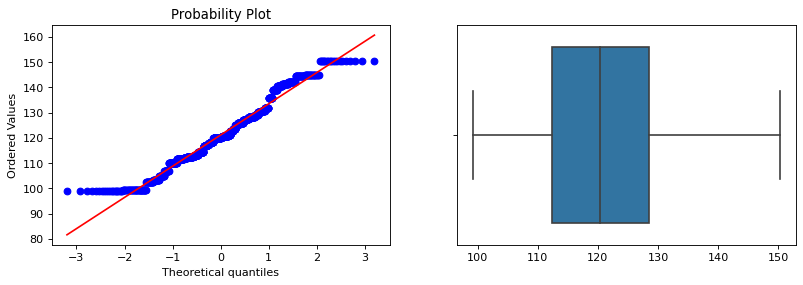

In [35]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

4) Calculate the mean (ùúáùë•) and the standard deviation (ùúéùë•) of the data including these sample means. Make a comparison between ùúáùë• and ùúáùë• , between ùúéùë•‚àöùëõ and ùúéùë• . Here, ùëõ is the number of sample means calculated from Item 3) above.

In [36]:
print("Mean (ùúáùë•) : " + str(mean_mean(seq_data_50)))
print("Standard deviation (ùúéùë•) : " + str(std_of_samples(seq_data_50)))

Mean (ùúáùë•) : 121.15296001199998
Standard deviation (ùúéùë•) : 12.489175897769007


In [37]:
print("Mean ùúáùë•: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(seq_data_50))
print("ùúéùë•/‚àöùëõ : ", (np.std(df['Close_ETF'])/math.sqrt(50)) ,"and standard deviation of samples : ", std_of_samples(seq_data_50))

Mean ùúáùë•:  121.1529600120001 and mean of samples :  121.15296001199998
ùúéùë•/‚àöùëõ :  1.7767477529860964 and standard deviation of samples :  12.489175897769007


5) Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?

6) Break the population into 10 groups sequentially and each group includes 100 values.

In [38]:
#Spliting 10 groups sequentially
seq_data_100 = split_data_seq(df['Close_ETF'], 10)

7) Repeat Items 3) ~ 5).

In [39]:
print("Sample mean (ùë•) of each group")
print_mean(seq_data_100)

Sample mean (ùë•) of each group
group1---> 100.77430028999999
group2---> 110.48050028
group3---> 112.01809938999999
group4---> 114.51720014000003
group5---> 118.40030003999999
group6---> 121.67680029999993
group7---> 125.78560010999992
group8---> 128.01269997999995
group9---> 135.3920996399999
group10---> 144.47199995


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

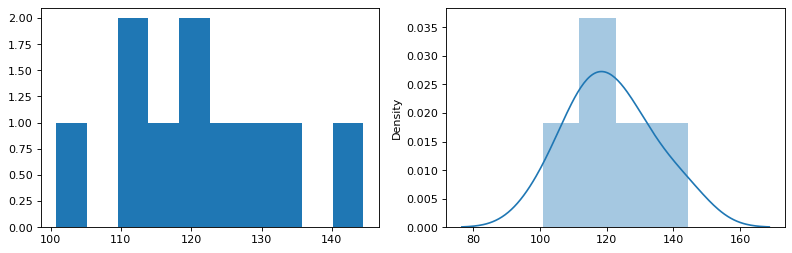

In [40]:
#Histogram of sample mean
mean_seq_data_100 = mean_array(seq_data_100)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_seq_data_100)
plt.subplot(2,2,2)
sns.distplot(mean_seq_data_100, hist=True, kde=True)

Total Sample :  1000


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

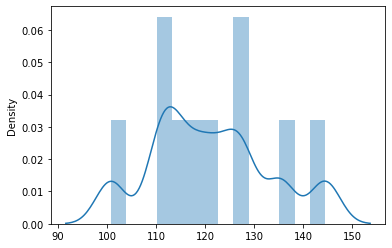

In [41]:
#Histogram of sample mean for 1000 size
array_of_mean = []
for i in range(100):
    seq_data = split_data_seq(df['Close_ETF'], 10)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

Statistics=1221.241, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


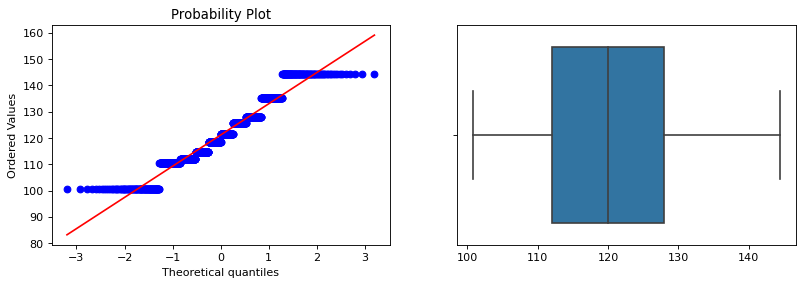

In [42]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [43]:
print("Mean (ùúáùë•) : " + str(mean_mean(seq_data_100)))
print("Standard deviation (ùúéùë•) : " + str(std_of_samples(seq_data_100)))

Mean (ùúáùë•) : 121.15296001199997
Standard deviation (ùúéùë•) : 12.16375686089257


In [44]:
print("Mean ùúáùë•: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(seq_data_100))
print("ùúéùë•/‚àöùëõ : ", (np.std(df['Close_ETF'])/math.sqrt(100)) ,"and standard deviation of samples : ", std_of_samples(seq_data_100))

Mean ùúáùë•:  121.1529600120001 and mean of samples :  121.15296001199997
ùúéùë•/‚àöùëõ :  1.2563503845944297 and standard deviation of samples :  12.16375686089257


8) Generate 50 simple random samples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values.

In [45]:
#Spliting 50 simple random groups
random_data_50 = split_data_random(df['Close_ETF'], 20, 50)

9) Repeat Items 3) ~ 5).

In [46]:
print("Sample mean (ùë•) of each group")
print_mean(random_data_50)

Sample mean (ùë•) of each group
group1---> 119.62050065000001
group2---> 120.6930007
group3---> 125.02299965
group4---> 122.63749990000004
group5---> 121.06350030000002
group6---> 121.41749910000001
group7---> 121.2699993
group8---> 116.65850025
group9---> 118.05099939999998
group10---> 121.37300109999998
group11---> 119.81250040000002
group12---> 121.34549904999999
group13---> 121.65349890000002
group14---> 122.28999939999999
group15---> 125.42899934999998
group16---> 121.60000005000002
group17---> 125.31899899999999
group18---> 118.27949935
group19---> 123.02099989999999
group20---> 122.95950084999997
group21---> 125.45350004999997
group22---> 120.18600015
group23---> 119.74749990000001
group24---> 120.98349945
group25---> 122.00800004999999
group26---> 114.81000065
group27---> 117.36950075
group28---> 120.87150154999999
group29---> 123.02500075
group30---> 117.87700070000001
group31---> 118.78999974999999
group32---> 120.68350045
group33---> 117.24550015
group34---> 121.76950040000

C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

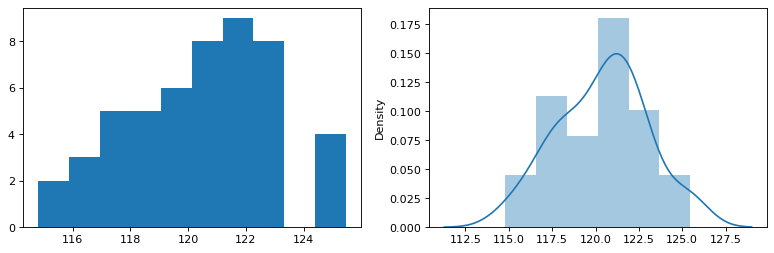

In [47]:
#Histogram of sample mean
mean_random_data_50 = mean_array(random_data_50)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_random_data_50)
plt.subplot(2,2,2)
sns.distplot(mean_random_data_50, hist=True, kde=True)

Total Sample :  1000


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

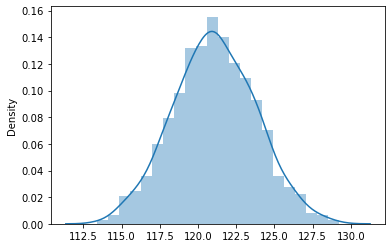

In [48]:
#Histogram of sample mean of 1000 sample
array_of_mean = []
for i in range(20):
    seq_data = split_data_random(df['Close_ETF'], 20, 50)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

C:\Users\amitk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistics=60.304, p=1.000
Sample looks Gaussian (fail to reject H0)


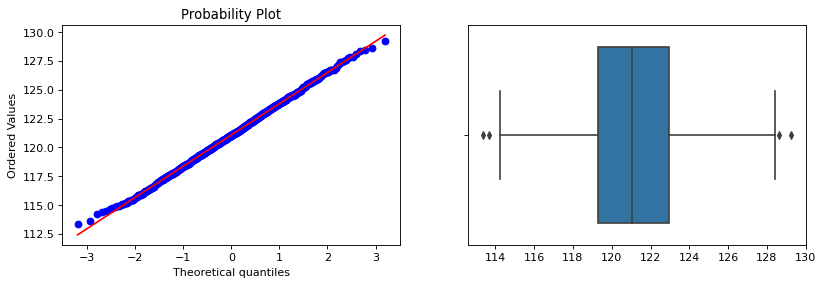

In [49]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [50]:
print("Mean (ùúáùë•) : " + str(mean_mean(random_data_50)))
print("Standard deviation (ùúéùë•) : " + str(std_of_samples(random_data_50)))

Mean (ùúáùë•) : 120.396190071
Standard deviation (ùúéùë•) : 2.550343817050632


In [51]:
print("Mean ùúáùë•: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(random_data_50))
print("ùúéùë•/‚àöùëõ : ", (np.std(df['Close_ETF'])/math.sqrt(50)) ,"and standard deviation of samples : ", std_of_samples(random_data_50))

Mean ùúáùë•:  121.1529600120001 and mean of samples :  120.396190071
ùúéùë•/‚àöùëõ :  1.7767477529860964 and standard deviation of samples :  2.550343817050632


10) Generate 10 simple random samples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.

In [52]:
#Spliting 10 simple random samples or groups
random_data_100 = split_data_random(df['Close_ETF'], 100, 10)

11) Repeat Items 3) ~ 5).

In [53]:
print("Sample mean (ùë•) of each group")
print_mean(random_data_100)

Sample mean (ùë•) of each group
group1---> 123.44810028999997
group2---> 119.68639987000002
group3---> 122.62239998000003
group4---> 120.13409969
group5---> 120.5427002
group6---> 123.14450011999999
group7---> 122.2822001
group8---> 120.61079991000001
group9---> 120.99420006000003
group10---> 119.28439978000004


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

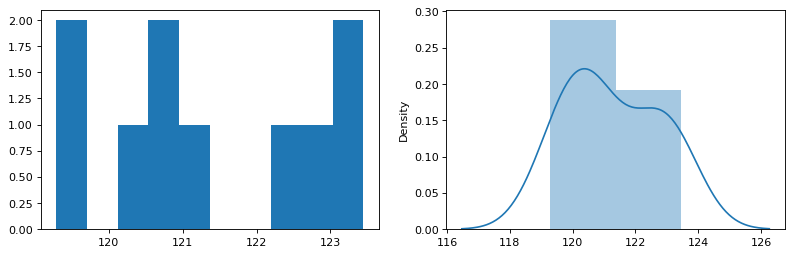

In [54]:
#Histogram of mean of samples
mean_random_data_100 = mean_array(random_data_100)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_random_data_100)
plt.subplot(2,2,2)
sns.distplot(mean_random_data_100, hist=True, kde=True)

Total Sample :  1000


C:\Users\amitk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

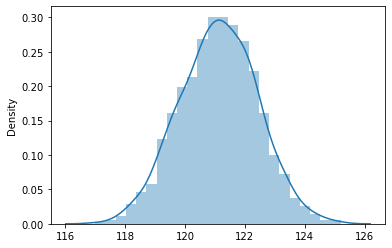

In [55]:
#Histogram of mean of 1000 samples
array_of_mean = []
for i in range(100):
    seq_data = split_data_random(df['Close_ETF'], 100, 10)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

C:\Users\amitk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistics=13.931, p=1.000
Sample looks Gaussian (fail to reject H0)


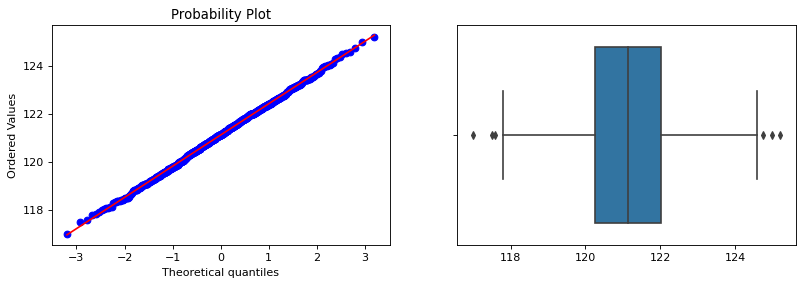

In [56]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [57]:
print("Mean (ùúáùë•) : " + str(mean_mean(random_data_100)))
print("Standard deviation (ùúéùë•) : " + str(std_of_samples(random_data_100)))

Mean (ùúáùë•) : 121.27498
Standard deviation (ùúéùë•) : 1.4103687745345175


In [58]:
print("Mean ùúáùë•: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(random_data_100))
print("ùúéùë•/‚àöùëõ : ", (np.std(df['Close_ETF'])/math.sqrt(100)) ,"and standard deviation of samples : ", std_of_samples(random_data_100))

Mean ùúáùë•:  121.1529600120001 and mean of samples :  121.27498
ùúéùë•/‚àöùëõ :  1.2563503845944297 and standard deviation of samples :  1.4103687745345175
